# 関数 save_fig：プロット結果をファイルへ保存する

In [1]:
# 2バイト文字をグラフで扱うためのパッケージインストール
!pip install japanize-matplotlib

import os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

def save_fig(plt, file_prefix, bbox_inches='tight'):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches=bbox_inches, pad_inches = 0.2)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches=bbox_inches, pad_inches = 0.2)

import sys
from datetime import datetime
import uuid

def dmcode():
    t = datetime.now().strftime('%f%S%M%H%d%m%Y')
    buff = ['***DMCODE', t, str(uuid.uuid4())]
    print(' '.join(buff))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=874ad04cf28a3de3db58dbd25f9f9f6850146a75e17984948aeef7032b3db36b
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# 関数 draw_vector：矢印を描画

In [2]:
from matplotlib.patches import ArrowStyle

def draw_vector(v0, v1, color='black'):
    ax = plt.gca()
    a = ArrowStyle('->', head_length=0.5, head_width=0.5)
    arrowprops = dict(arrowstyle=a, #'->',
                      linewidth=2,
                      shrinkA=0, shrinkB=0,
                      color=color)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# 関数 show_pca2d_result：2次元PCAの結果表示

In [3]:
def show_pca2d_result(X, Z, eigen_vectors, xy_range=None, xlabel=None, ylabel=None, file_prefix=''):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
    x_mean = X.mean(axis=0)

    L = 1
    if xy_range is not None:
        L = xy_range[1] / 10

    # L = np.array([10, 10])
    C = ['red', 'black']
    for i, v in enumerate(eigen_vectors):
        v = v * L
        draw_vector(x_mean, x_mean + v, C[i])

    if xy_range is not None:
        plt.xlim(xy_range)
        plt.ylim(xy_range)
    else:
        plt.xlim(-4, 8)
        plt.ylim(-8, 4)

    plt.title('元データ空間', fontsize=16)
    if xlabel is not None:
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5)

    l = np.min(Z)
    u = np.max(Z)
    if xy_range is not None:
        plt.xlim(l - 5, u + 5)
        plt.ylim(l - 5, u + 5)
    else:
        plt.xlim(-6, 6)
        plt.ylim(-6, 6)

    plt.xlabel('z1', fontsize=14)
    plt.ylabel('z2', fontsize=14)
    plt.title('主成分空間', fontsize=16)
    plt.tight_layout()
    save_fig(plt, file_prefix)
    plt.show()

# 実習14.1：2次元上の4点データに対する分散共分散行列の計算

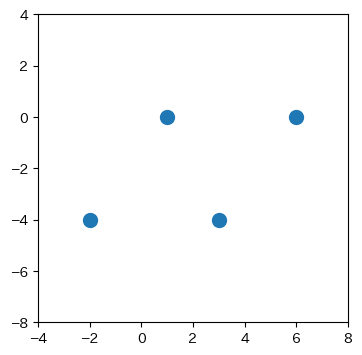

データの平均
[ 2. -2.]
データの分散共分散行列
[[8.5 3. ]
 [3.  4. ]]
中心化したデータの分散共分散行列
[[8.5 3. ]
 [3.  4. ]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 行ベクトル4個としてデータを用意
x=np.array([[6,0],
            [1,0],
            [-2,-4],
            [3,-4]], dtype=np.float32)

plt.figure(figsize=(4,4))
plt.scatter(x[:,0],x[:,1],s=100)
plt.xlim(-4,8)
plt.ylim(-8,4)
plt.show()
print('データの平均')
x_mean=x.mean(axis=0)
print(x_mean)
print('データの分散共分散行列')
# 列ベクトル4個として、分散共分散行列を計算するため、データを転置する
x_cov=np.cov(x.T,bias=True)
print(x_cov)

# 中心化
x2=x-x_mean
x2_cov=np.cov(x2.T,bias=True)
print('中心化したデータの分散共分散行列')
print(x2_cov)

# 実習14.2：主成分分析

主成分空間へ射影したデータ
[[-4.4721360e+00 -2.9949387e-08]
 [ 1.9323799e-07 -2.2360678e+00]
 [ 4.4721365e+00  2.8542454e-08]
 [-1.0379283e-08  2.2360682e+00]]
主成分空間における分散共分散行列
[[ 1.33333351e+01 -6.45728782e-08]
 [-6.45728782e-08  3.33333343e+00]]
因子寄与
[13.333336   3.3333333]
主成分
[[-0.8944272 -0.4472136]
 [ 0.4472136 -0.8944272]]


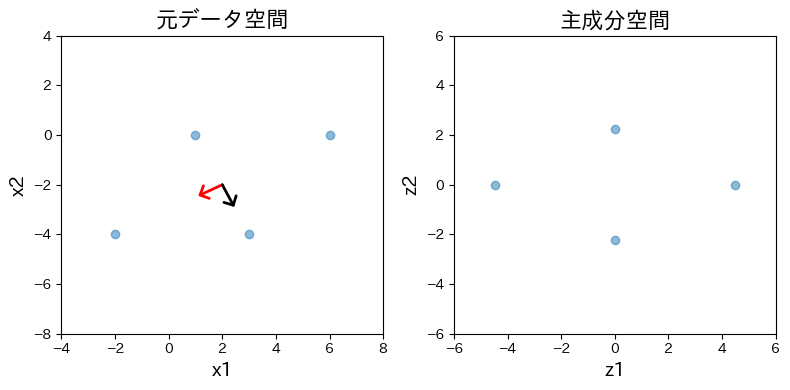

In [6]:
from sklearn.decomposition import PCA

# 行ベクトル4個としてデータを用意。実習14.1と同じ。
x=np.array([[6,0],
            [1,0],
            [-2,-4],
            [3,-4]], dtype=np.float32)

# 主成分分析用クラスのインスタンスを生成
# n_components=2: 主成分数2を指定
pca=PCA(n_components=2)

z=pca.fit_transform(x) # 主成分を求めて、主成分空間へデータを射影
print('主成分空間へ射影したデータ')
print(z)
print('主成分空間における分散共分散行列')
z_cov=np.cov(z.T)
print(z_cov)

print('因子寄与')
eigen_values=pca.explained_variance_
print(eigen_values)

print('主成分')
eigen_vectors=pca.components_
print(eigen_vectors)

# 元データ空間と主成分空間での比較
show_pca2d_result(x,z,eigen_vectors, xlabel='x1',ylabel='x2')

# 実習14.3*：試験の点数データセットの読み込み*

In [8]:
import pandas as pd

df = pd.read_csv('dm14-1.csv')
df

,国語,数学
0,75,70
1,53,38
2,54,58
3,48,49
4,68,56
...,...,...
995,58,59
996,36,46
997,58,52
998,63,66


# 実習14.4：試験の点数データセットに対する主成分分析

因子寄与
[172.79117958  25.84730191]
主成分
[[ 0.69231817  0.72159237]
 [-0.72159237  0.69231817]]


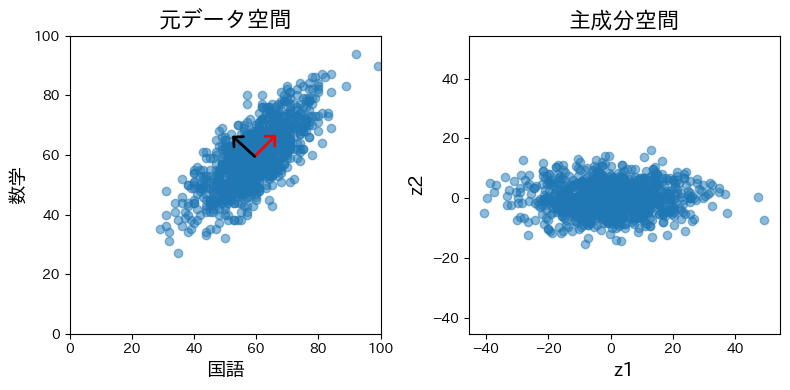

In [9]:
from sklearn.decomposition import PCA

# 国語と数学の列を取り出し、Numpy配列へ変換
x=df.to_numpy()

pca=PCA(n_components=2) # 主成分数2を指定
z=pca.fit_transform(x) # 主成分を求めて、主成分空間へデータを射影

print('因子寄与')
eigen_values=pca.explained_variance_
print(eigen_values)

print('主成分')
eigen_vectors=pca.components_
print(eigen_vectors)
# 元データ空間と主成分空間での比較
show_pca2d_result(x,z,eigen_vectors, xy_range=(0,100), xlabel='国語',ylabel='数学')

# 実習14.5：第1主成分のみを使ったデータの再構成（次元削減）

次元削減したz2の形状: (1000, 1)
因子寄与
[172.79117958]
主成分
[[0.69231817 0.72159237]]
第1主成分から再構成したデータx2の形状 (1000, 2)


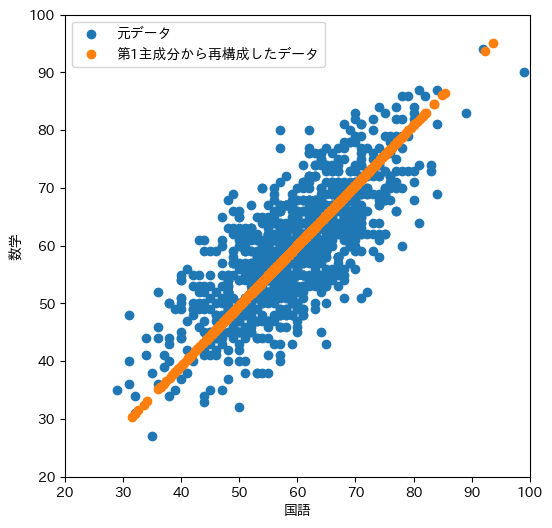

In [10]:
from sklearn.decomposition import PCA

# 国語と数学の列を取り出し、Numpy配列へ変換
x=df.to_numpy()

pca2=PCA(n_components=1) # 主成分数1を指定
z2=pca2.fit_transform(x) # 主成分を求めて、主成分空間へデータを射影
print('次元削減したz2の形状:', z2.shape)

print('因子寄与')
eigen_values=pca2.explained_variance_
print(eigen_values)

print('主成分')
eigen_vectors=pca2.components_
print(eigen_vectors)
# 主成分空間から元の空間へデータを再構成（逆変換）する
x2=pca2.inverse_transform(z2)
print('第1主成分から再構成したデータx2の形状', x2.shape)
plt.figure(figsize=(6,6))
plt.scatter(x[:,0],x[:,1],label='元データ')
plt.scatter(x2[:,0],x2[:,1],label='第1主成分から再構成したデータ')
plt.xlabel('国語')
plt.ylabel('数学')
plt.xlim(20,100)
plt.ylim(20,100)
plt.legend()
plt.show()